In [1]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data',
header=None, sep='\s+') 
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS',
                     'NOX', 'RM', 'AGE', 'DIS', 'RAD',
                     'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


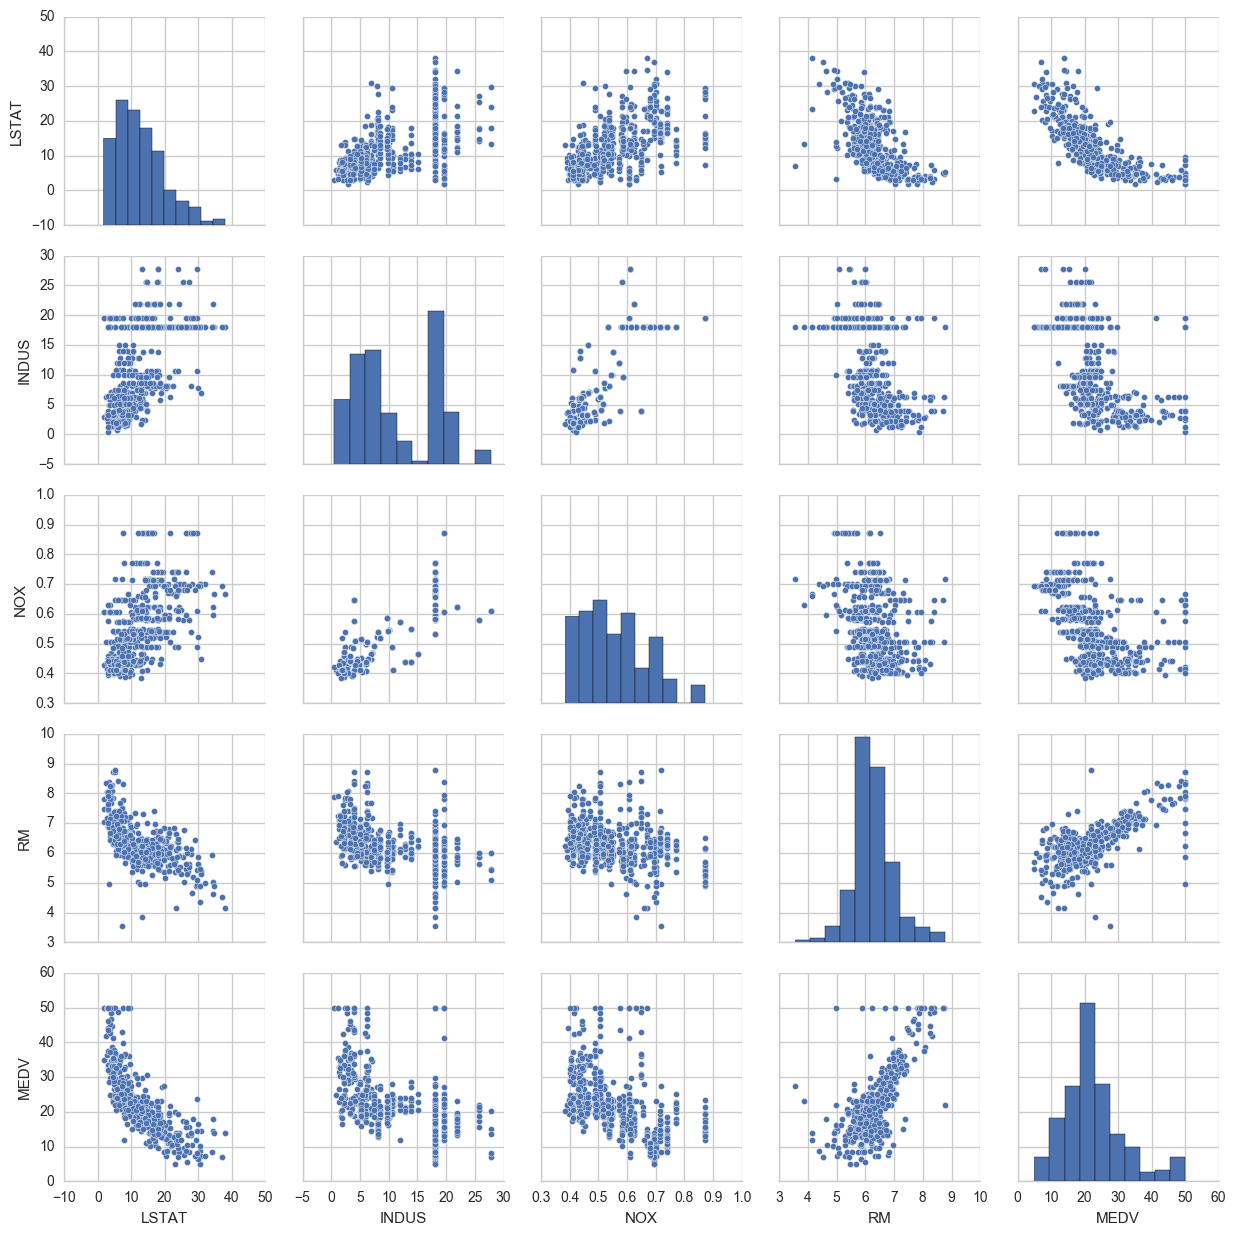

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb 
sb.set(style='whitegrid', context='notebook') 
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV'] 
sb.pairplot(df[cols], size=2.5)
plt.show()

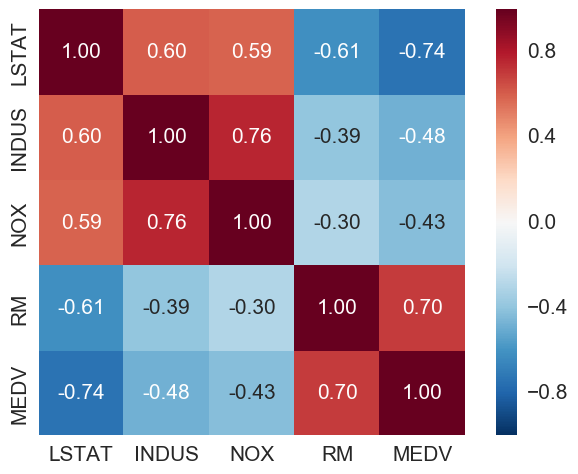

In [4]:
import numpy as np
cor_matrix = np.corrcoef(df[cols].values.T)
sb.set(font_scale=1.5)
cor_heat_map = sb.heatmap(cor_matrix, cbar=True, annot=True,square=True,
                        fmt='.2f', annot_kws={'size':15},
                        yticklabels=cols,
                        xticklabels=cols)
plt.show()

In [5]:
X = df[['RM']].values
y = df[['MEDV']].values
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()

X_std=sc_x.fit_transform(X)
y_std=sc_y.fit_transform(y)

print('original data\n', y[0:4])
print('scaled data using sklearn StandardScalar\n',y_std[0:4])

print('Average of original data',np.average(y[:]))
print('STDV of original data',np.std(y[:]))
z_Scores=(y[:] - np.average(y[:])) / np.std(y[:])
print('Manually computed z-scores:\n',z_Scores[0:4])

#print('average of original data',np.average(y[:]))
#print('STDV of original data',np.std(y[:]))
#z_scores=


('original data\n', array([[ 24. ],
       [ 21.6],
       [ 34.7],
       [ 33.4]]))
('scaled data using sklearn StandardScalar\n', array([[ 0.15968566],
       [-0.10152429],
       [ 1.32424667],
       [ 1.18275795]]))
('Average of original data', 22.532806324110677)
('STDV of original data', 9.1880115452782025)
('Manually computed z-scores:\n', array([[ 0.15968566],
       [-0.10152429],
       [ 1.32424667],
       [ 1.18275795]]))


In [6]:
X=df[['RM']].values
y=df[['MEDV']].values
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y)
print 'Original data\n',y[0:4]
print 'Scaled data using sklearn StandardScaler\n',y_std[0:5]

print 'Average of original data',np.average(y[:])
print 'STDV of original data',np.std(y[:])
z_scores = (y[:]-np.average(y[:]))/np.std(y[:])
print 'Manually computed z scores:\n',z_scores[0:5]

Original data
[[ 24. ]
 [ 21.6]
 [ 34.7]
 [ 33.4]]
Scaled data using sklearn StandardScaler
[[ 0.15968566]
 [-0.10152429]
 [ 1.32424667]
 [ 1.18275795]
 [ 1.48750288]]
Average of original data 22.5328063241
STDV of original data 9.18801154528
Manually computed z scores:
[[ 0.15968566]
 [-0.10152429]
 [ 1.32424667]
 [ 1.18275795]
 [ 1.48750288]]


In [7]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X,y)
print 'Slope: %.3f' %slr.coef_[0]
print 'Intercept: %.3f' %slr.intercept_
slr_std = LinearRegression()
slr_std.fit(X_std,y_std)
print 'Slope: %.3f' %slr_std.coef_[0]
print 'Intercept: %3f' %slr_std.intercept_

Slope: 9.102
Intercept: -34.671
Slope: 0.695
Intercept: -0.000000


In [8]:
import numpy as np
num_rooms = [5.0]
nums_rooms_std = sc_x.transform(np.array(num_rooms).reshape(len(num_rooms),1))
print 'Standardized rooms: %.3f'%nums_rooms_std
predicted_price_std = slr_std.predict(nums_rooms_std)
print 'Predicted price: %.3f' %predicted_price_std
print "Predicted price in $1000's using standardized data: %.3f" %sc_y.inverse_transform(predicted_price_std)

predicated_price_non_std = slr.predict(np.array(num_rooms).reshape(len(num_rooms),1))
print "Predicted price in $1000's using non-standardized data: %.3f" %predicated_price_non_std

Standardized rooms: -1.830
Predicted price: -1.273
Predicted price in $1000's using standardized data: 10.840
Predicted price in $1000's using non-standardized data: 10.840


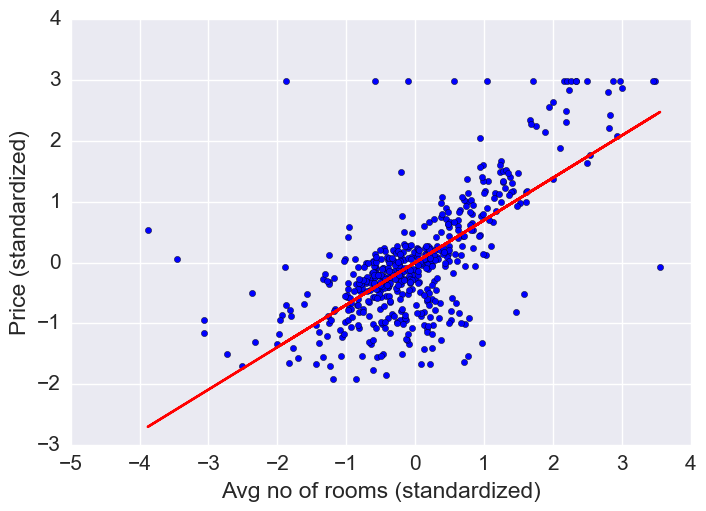

In [9]:
plt.scatter(X_std,y_std,c='blue')
plt.plot(X_std,slr_std.predict(X_std),color='red')
plt.xlabel('Avg no of rooms (standardized)')
plt.ylabel('Price (standardized)')
plt.show()

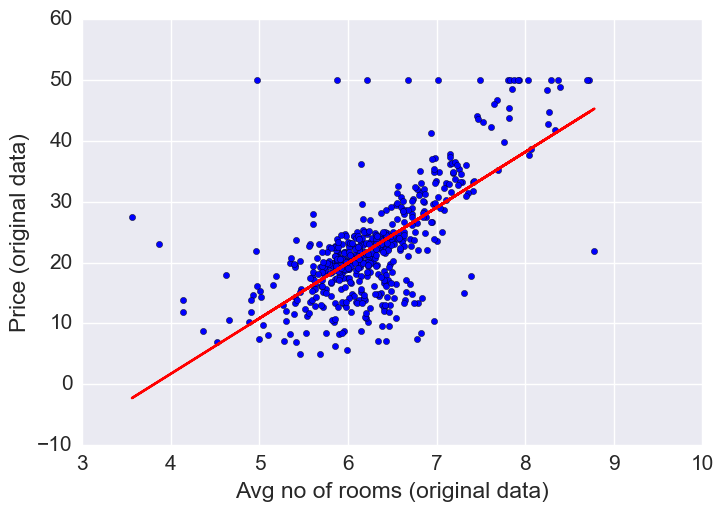

In [10]:
plt.scatter(X,y,c='blue')
plt.plot(X,slr.predict(X),color='red')
plt.xlabel('Avg no of rooms (original data)')
plt.ylabel('Price (original data)')
plt.show()

# - Since our model is using multiple explanatory variables we can't visualize the linear regression line (or
the hyperplane) in a two-dimensional plot,but we can plot the residuals (the differences or vertical
distances between the actual and predicted values) versus the predicted values to diagnose our
regression model. We can use the residual plot to detect problems like nonlinearity, outliers, and to
check if the errors are randomly distributed. 

In [11]:
from sklearn.metrics import mean_squared_error, r2_score
# first let's focus on original un-standardized data and model
MSE1 = mean_squared_error(y_true= y, y_pred= slr.predict(X))
r2_1 = r2_score(y_true= y, y_pred= slr.predict(X))
print('MSE for regression model using un-standrdized features: %.3f' % MSE1)
print('RMSE:', np.sqrt(MSE1))
print('r2:', r2_1)
print('===============================')
#now let's do the same thing for standardized data and regression model
MSE_2 = mean_squared_error(y_true= y_std, y_pred=slr_std.predict(X_std) )
print('MSE for standardized data:', MSE_2)
y_true_converted_to_originl = sc_y.inverse_transform(y_std)
y_pred_converted_to_original = sc_y.inverse_transform(slr_std.predict(X_std))
MSE2 = mean_squared_error(y_true= y_true_converted_to_originl, y_pred=
y_pred_converted_to_original)
r2_2 = r2_score(y_true= y_std, y_pred= slr_std.predict(X_std))
r2_2_using_data_converted_to_original_scale = r2_score(y_true= y_true_converted_to_originl,
y_pred= y_pred_converted_to_original)
print('MSE using standardized features converted to original scale: %.3f' % MSE2)
print('RMSE:', np.sqrt(MSE2))
print('r2 using standardized data and model:',r2_2)
print('r2 using data converted to original scale', r2_2_using_data_converted_to_original_scale)

MSE for regression model using un-standrdized features: 43.601
('RMSE:', 6.6030713892225608)
('r2:', 0.48352545599133423)
('MSE for standardized data:', 0.51647454400866588)
MSE using standardized features converted to original scale: 43.601
('RMSE:', 6.6030713892225616)
('r2 using standardized data and model:', 0.48352545599133401)
('r2 using data converted to original scale', 0.48352545599133412)


In [12]:
from sklearn.cross_validation import train_test_split
X = df.iloc[:, :-1].values #multiple attributes used for predictions
y = df['MEDV'].values # notice we access the column data by passing the column string name
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

/Users/tusharpandit/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


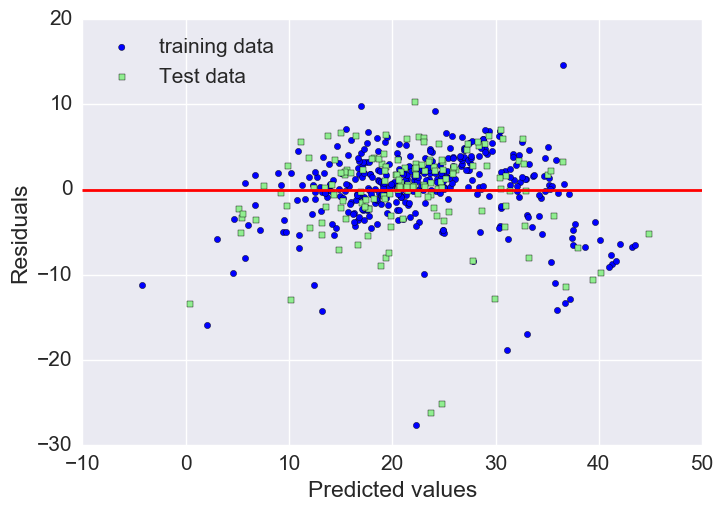

In [13]:
plt.scatter(y_train_pred,y_train_pred - y_train, c= 'blue', marker='o', label='training data')
plt.scatter(y_test_pred, y_test_pred - y_test, c= 'lightgreen', marker='s', label= 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlim([-10,50])
plt.show()

# - notice the outlier - the points with a larg deviation from the centerline
# - also notice the pattern in residuals, which means our model is unable to capture some explanatory
variable
# - now we compute a quantitative measure of the performance of the regression model
# - we compute MSE, which is the average of SSE cost function that we optimize to get the regression
model
# - MSE is useful for comparing different regression model or tuning their parameters

In [14]:
print('MSE train: %.3f, test: %.3f' % (
 mean_squared_error(y_train, y_train_pred),
 mean_squared_error(y_test, y_test_pred)))

MSE train: 19.958, test: 27.196


 - notic that MSE on training is larger comapred to traing so our model is overfitting the training data
#- now we compute the coefficient of determination R2, which is a standardized version of MSE
#- R2 is computed as ( 1 - SSE/SST) where SST is the variance of the response variable.
#- R2 is the fraction of the response variance that is captured by the model. 

In [15]:
print('R^2 train: %.3f, test: %.3f' % (
 r2_score(y_train, y_train_pred),
 r2_score(y_test, y_test_pred)))

R^2 train: 0.765, test: 0.673


In [16]:
# One way to tackle the overfitting problem is to use regularization. Let's try Ridge Regression, Least
# Absolute Shrinkage and Selection Operator (LASSO) Regression, and Elastic Net Regressionmethods

In [17]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

ridge_regressor = Ridge(alpha=1.0)
lasso_regressor = Lasso(alpha=1.0)
elastic_regressor = ElasticNet(alpha=1.0, l1_ratio=0.5)
ridge_regressor.fit(X_train, y_train)

y_train_pred_ridge = ridge_regressor.predict(X_train)
y_test_pred_ridge = ridge_regressor.predict(X_test)
print('MSE train Ridge: %.3f, test: %.3f' %
 (mean_squared_error(y_train, y_train_pred_ridge),
 mean_squared_error(y_test, y_test_pred_ridge)))
print('R^2 train Ridge: %.3f, test: %.3f' % (
 r2_score(y_train, y_train_pred_ridge),
 r2_score(y_test, y_test_pred_ridge)))


lasso_regressor.fit(X_train, y_train)
y_train_pred_lasso = lasso_regressor.predict(X_train)
y_test_pred_lasso = lasso_regressor.predict(X_test)
print('MSE train Lasso: %.3f, test: %.3f' %
 (mean_squared_error(y_train, y_train_pred_lasso),
 mean_squared_error(y_test, y_test_pred_lasso)))
print('R^2 train Lasso: %.3f, test: %.3f' % (
 r2_score(y_train, y_train_pred_lasso),
 r2_score(y_test, y_test_pred_lasso)))


elastic_regressor.fit(X_train, y_train)
y_train_pred_elastic = elastic_regressor.predict(X_train)
y_test_pred_elastic = elastic_regressor.predict(X_test)
print('MSE train elastic: %.3f, test: %.3f' %
 (mean_squared_error(y_train, y_train_pred_elastic),
 mean_squared_error(y_test, y_test_pred_elastic)))
print('R^2 train elastic: %.3f, test: %.3f' % (
 r2_score(y_train, y_train_pred_elastic),
 r2_score(y_test, y_test_pred_elastic)))

MSE train Ridge: 20.145, test: 27.762
R^2 train Ridge: 0.762, test: 0.667
MSE train Lasso: 24.717, test: 32.345
R^2 train Lasso: 0.708, test: 0.612
MSE train elastic: 24.381, test: 31.874
R^2 train elastic: 0.712, test: 0.617


- Now let's do a Random Forest Regression

In [18]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=1000,
 criterion='mse',
 random_state=1,
 n_jobs=-1) #n_jobs=-1 use all cores in the machine
forest.fit(X_train,y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

print('MSE train: %.3f, test: %.3f' % (
 mean_squared_error(y_train,y_train_pred),
 mean_squared_error(y_test,y_test_pred)))
print('R2 train: %.3f, test: %.3f' % (
 r2_score(y_train,y_train_pred),
 r2_score(y_test,y_test_pred)))
print('feature importances: ', forest.feature_importances_)

MSE train: 1.409, test: 14.354
R2 train: 0.983, test: 0.828
('feature importances: ', array([ 0.03646835,  0.00147287,  0.00815337,  0.00174486,  0.01611471,
        0.44747402,  0.01272985,  0.03728278,  0.00418061,  0.0167017 ,
        0.02260298,  0.01103352,  0.38404037]))
